In [13]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns

In [19]:
with open('features.pk', 'rb') as handle:
    interpol_data = pickle.load(handle)

In [42]:
y = interpol_data['IcNaOk']
X = interpol_data.drop(columns=['IcNaOk'])
X = X.drop(columns=['MeetTijd','Mode HR(bpm)','Mode SpO2(%)','Mode NIBP(mmHg)'])

In [43]:
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [45]:
X_train

,Length_MeetTijd,Mean HR(bpm),Std HR(bpm),Max HR(bpm),Min HR(bpm),Median HR(bpm),Quantile 1 HR(bpm),Quantile 2 HR(bpm),Quantile 3 HR(bpm),Quantile 4 HR(bpm),...,Quantile 90 NIBP(mmHg),Quantile 91 NIBP(mmHg),Quantile 92 NIBP(mmHg),Quantile 93 NIBP(mmHg),Quantile 94 NIBP(mmHg),Quantile 95 NIBP(mmHg),Quantile 96 NIBP(mmHg),Quantile 97 NIBP(mmHg),Quantile 98 NIBP(mmHg),Quantile 99 NIBP(mmHg)
4819,237,70.816456,25.435138,220.0,51.0,63.0,52.00,53.44,54.08,55.0,...,137.0,139.00,139.0,139.00,139.00,139.000000,139.00,139.92,140.0,140.64
7998,218,77.142202,10.702952,110.0,58.0,78.0,59.00,60.00,60.00,61.0,...,147.0,147.00,149.0,149.00,149.00,149.000000,149.32,150.00,150.0,150.00
8002,638,91.385580,8.767204,113.0,72.0,91.0,75.37,77.00,78.00,78.0,...,141.0,141.00,142.0,143.00,143.00,143.000000,143.00,143.00,145.0,145.00
1556,324,59.320988,6.920763,98.0,40.0,58.5,49.00,49.00,49.00,49.0,...,146.0,147.93,148.0,148.00,149.24,150.000000,150.00,150.00,150.0,152.00
2479,246,79.932927,8.131826,155.0,62.0,79.0,66.45,68.90,70.00,70.0,...,160.0,162.00,162.0,164.00,164.60,166.000000,166.20,167.00,167.5,172.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,116,103.577586,23.971301,145.0,64.0,112.5,66.00,66.30,67.00,67.6,...,185.5,186.00,186.0,186.00,186.20,188.000000,188.00,188.00,188.0,199.05
6834,270,66.351852,8.513948,87.0,51.0,65.0,52.69,53.00,53.07,54.0,...,136.0,137.00,137.0,141.02,146.00,146.000000,180.00,180.00,180.0,186.00
6888,1010,60.862376,7.534518,117.0,47.0,59.0,48.00,49.00,49.00,50.0,...,152.0,153.00,153.0,153.00,154.38,156.183333,157.00,159.00,161.0,169.00
7123,226,59.150442,7.904542,84.0,48.0,58.0,49.00,49.00,49.00,49.0,...,129.5,131.00,131.0,136.00,136.00,136.000000,138.00,138.00,138.0,138.00


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = X_train.columns
X = X_train[cols]
y = y_train
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 300)
rfe = rfe.fit(X_train, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)', 'Quantile 1 HR(bpm)', 'Quantile 2 HR(bpm)', 'Quantile 3 HR(bpm)', 'Quantile 5 HR(bpm)', 'Quantile 6 HR(bpm)', 'Quantile 7 HR(bpm)', 'Quantile 8 HR(bpm)', 'Quantile 9 HR(bpm)', 'Quantile 10 HR(bpm)', 'Quantile 11 HR(bpm)', 'Quantile 12 HR(bpm)', 'Quantile 13 HR(bpm)', 'Quantile 14 HR(bpm)', 'Quantile 15 HR(bpm)', 'Quantile 16 HR(bpm)', 'Quantile 17 HR(bpm)', 'Quantile 18 HR(bpm)', 'Quantile 19 HR(bpm)', 'Quantile 20 HR(bpm)', 'Quantile 21 HR(bpm)', 'Quantile 22 HR(bpm)', 'Quantile 23 HR(bpm)', 'Quantile 24 HR(bpm)', 'Quantile 25 HR(bpm)', 'Quantile 26 HR(bpm)', 'Quantile 27 HR(bpm)', 'Quantile 28 HR(bpm)', 'Quantile 29 HR(bpm)', 'Quantile 30 HR(bpm)', 'Quantile 31 HR(bpm)', 'Quantile 32 HR(bpm)', 'Quantile 33 HR(bpm)', 'Quantile 34 HR(bpm)', 'Quantile 35 HR(bpm)', 'Quantile 36 HR(bpm)', 'Quantile 37 HR(bpm)', 'Quantile 38 HR(bpm)', 'Quantile 39 HR(bpm)', 'Quantile 40 HR(

Optimal number of features: 296
Selected features: ['Length_MeetTijd', 'Mean HR(bpm)', 'Std HR(bpm)', 'Max HR(bpm)', 'Min HR(bpm)', 'Median HR(bpm)', 'Quantile 1 HR(bpm)', 'Quantile 2 HR(bpm)', 'Quantile 3 HR(bpm)', 'Quantile 5 HR(bpm)', 'Quantile 6 HR(bpm)', 'Quantile 7 HR(bpm)', 'Quantile 8 HR(bpm)', 'Quantile 9 HR(bpm)', 'Quantile 10 HR(bpm)', 'Quantile 11 HR(bpm)', 'Quantile 12 HR(bpm)', 'Quantile 13 HR(bpm)', 'Quantile 14 HR(bpm)', 'Quantile 15 HR(bpm)', 'Quantile 16 HR(bpm)', 'Quantile 17 HR(bpm)', 'Quantile 18 HR(bpm)', 'Quantile 19 HR(bpm)', 'Quantile 20 HR(bpm)', 'Quantile 21 HR(bpm)', 'Quantile 22 HR(bpm)', 'Quantile 23 HR(bpm)', 'Quantile 24 HR(bpm)', 'Quantile 25 HR(bpm)', 'Quantile 26 HR(bpm)', 'Quantile 27 HR(bpm)', 'Quantile 28 HR(bpm)', 'Quantile 29 HR(bpm)', 'Quantile 30 HR(bpm)', 'Quantile 31 HR(bpm)', 'Quantile 32 HR(bpm)', 'Quantile 33 HR(bpm)', 'Quantile 34 HR(bpm)', 'Quantile 35 HR(bpm)', 'Quantile 36 HR(bpm)', 'Quantile 37 HR(bpm)', 'Quantile 38 HR(bpm)', 'Quanti

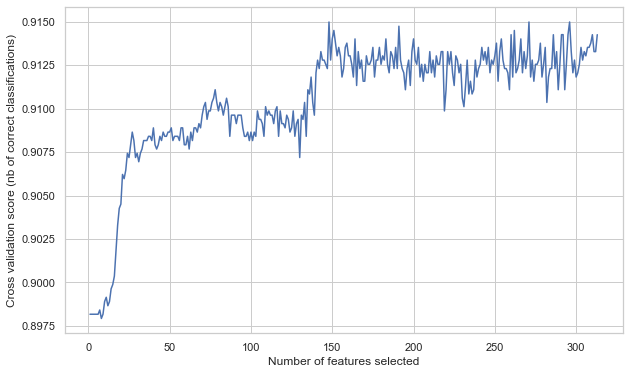

In [48]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [49]:

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

NameError: name 'final_train' is not defined

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

In [ ]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), 
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

In [ ]:
from sklearn.model_selection import GridSearchCV

X = final_train[Selected_features]

param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_

print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()

#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X, y)
results = log_clf.cv_results_

print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)

plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max()) 
ax.set_ylim(0.35, 0.95)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']): 
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]
        
    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()